# Contenido.
1. Introducción.
2. Importación de datos.
3. Exploracion de datos.
4. Tranfomación de datos.
5. Procesamiento de datos.
6. Anecedentes de datos.
7. Estudio de una plataforma en especifico.
8. Ventas por genero.
9. ventas por región.
10. Efecto de la clasificación ESRB.
11. Pruebas de hipótesis



## Introducción.

En este proyecto vamos a abordar el historial de ventas de videojuegos para la tienda online ICE,  la cual vende por todo el mundo, y nuestro proposito utilizando el dataset que contiene los datos desde el año 1980 hasta el 2016, es recuperar cual de todas estas ventas es la mas rentable para poder realizar una campaña para el año 2017. 
En el dataset podemos conseguir la reseñas de los usuarios las plataformas los videojuegos vendidos los años de lanzamiento y las ventas a nivel de continentes. 
Vamos a conseguir los rating que tienen como clasificacion ESRB que significa The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) esta evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.
Vamos a tener la conclusiones al terminar cada tramo del proyecto

## Importación de datos.

In [1]:
# vamos a importar nuestras librerias.
import pandas as pd 
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import levene

In [2]:
# Cargamos el archivo de nuestro dateframe
games = pd.read_csv('/datasets/games.csv')

## Exploracion de datos.

In [3]:
# vemos la informacion general de nuestro dateframe.
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Muesta general de los datos.
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- `Name` - Nombre
- `Platform` - Plataforma
- `Year_of_Release` - Año de lanzamiento
- `Genre` - Género del juago
- `NA_sales` - ventas en Norteamérica en millones de dólares estadounidenses
- `EU_sales` - ventas en Europa en millones de dólares estadounidenses
- `JP_sales` - ventas en Japón en millones de dólares estadounidenses
- `Other_sales` - ventas en otros países en millones de dólares estadounidenses
- `Critic_Score` - máximo de 100
- `User_Score` - máximo de 10
- `Clasificación` - ESRB

In [5]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
# Revisemos si nuestro dateframe tiene valores duplicados.
games.duplicated().sum()

0

**Conclusión**
- observamos en nuestra exploracion de datos que tenemos un dateframe de 16713 filas y 11 columnas.
- tenemos varia columnas las cuales estan en tipo de dato que no corresponde, estas debes ser modificadas.
- Hay 6 columnas con valores ausentes los cuales seran remplazado o eliminados dependiendo de su importancia en nuestro dateframe.
- Las columnas tienen letras en mayusculas por lo cual estas deben ser cambiadas.
- No tenemos valores duplicados en nuestra tabla de datos.

## Transformación de datos

In [7]:
# vamos a reemplazar los nombres de las columnas de mayusculas a minusculas.
games = games.rename(columns=str.lower)
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
# Vamos a eliminar los unicos dos valores ausentes de name y genre ya que estos no tienen valor en nuestro dateframe
games = games.dropna(subset=['name', 'genre'])

In [9]:
# Revisemos los valores unicos.
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
# Sumplatamos los valores tbd de user_score a nan para poder cambiar el tipo de dato
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [11]:
# Vamos a cambiar las columna user_sccore a float64 

games['user_score'] = games['user_score'].astype(float)


In [12]:
# reemplazo los valores ausentes de user_score con la mediana segun su genero.
games_user_median = games.groupby(['genre'])['user_score'].transform('median')
games['user_score'].fillna(games_user_median, inplace=True)

In [13]:
games_rating = games.groupby('genre')['rating'].apply(lambda x: x.mode().iloc[0]).to_dict()
games['rating'] = games['rating'].fillna(games['genre'].map(games_rating))

In [14]:
# Verifiquemos que se lograron los cambios.
print(games.isna().sum())
print()
print(games.info())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score            0
rating                0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64

In [15]:
# Veamos la informacion general 
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,7.7,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.8,T


**Conclusión**
- Limpiamos todo nuestro dateframe y lo dejamos sin valores nulos.
- Decidi suplantar los valores nulos de las columnas con la mediana ya que era el valor mas cercano a lo razonable.
- Cambie la columna year_of_release de float64 a int ya que esta corresponde a el año en que fue lanzado el juego.
- la columna user_score estaba como object y al ser un numero y que necesitamos para operaciones decidi cambialo a float64.
- la columna critic_score estaba en float64 pero siendo que los decimales eran solo un valor 0 fue mejor pasarla a int64

## Preprocesamiento de datos.

In [16]:
# calculemos la suma de ventas de todas las regiones pora cada juego 
games['sales_total'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,7.7,E,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.8,T,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,7.4,T,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,7.4,E,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,7.6,E,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,7.7,E,0.01


In [17]:
# Cantidad de juegos lanzados por año.
games_year = games.groupby('year_of_release')['name'].count()
games_year

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

In [18]:
# veamos el total de ventas por plataforma
games_plat_total = games.groupby('platform')['sales_total'].sum().sort_values(ascending=False)
games_plat_total

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sales_total, dtype: float64

In [19]:
# obtengamos las 10 plataforma mas vendidas.
games_plat = games.groupby('platform')['sales_total'].sum().nlargest(10)
games_plat

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: sales_total, dtype: float64

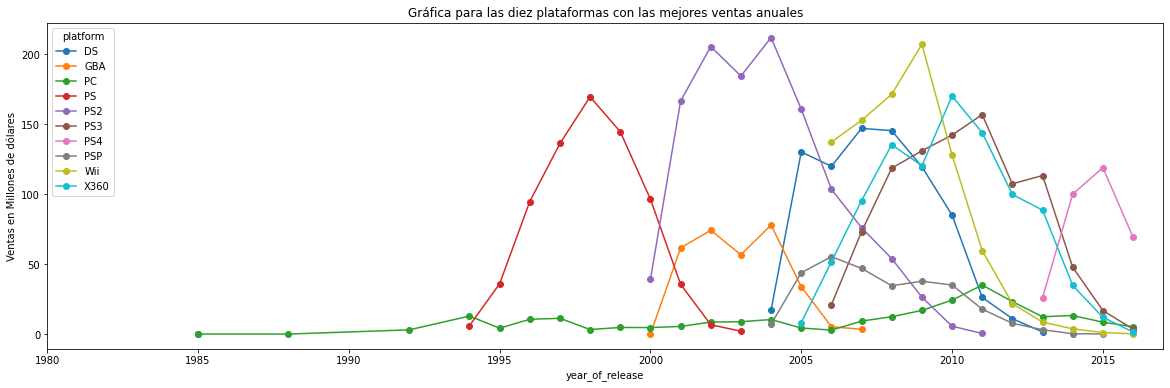

In [20]:
# gráfica para las diez plataformas con las mejores ventas anuales
grafica = games_plat.index.to_list()
data_dist = games.query('platform in @grafica')[['platform','year_of_release','sales_total']]\
            .pivot_table(index='year_of_release',columns='platform',values='sales_total',aggfunc='sum')\
            .plot(xlim=(1980,2017),style='o-',figsize=(20,6))
plt.ylabel('Ventas en Millones de dólares')
plt.title('Gráfica para las diez plataformas con las mejores ventas anuales')
plt.show()

**Conclusión**
- Relalizamos una suma de todas las ventas y la colocamos en una columna nueva para tener un total y asi relizar mejores calculos.
- Realizamos una agrupacion para obtener el total de juegos lanzados por año y notamos que entre los años 1980 hasta 1993 fueron muy pocos los juegos que fueron lanzados teniendo una alza desde 1994, pero fueron los años desde el 2006 hasta el 2011 donde se lanzaron mas juegos en venta. 
- Proceguimos con el total de ventas por plataforma y nos quedamos para nuestros futuros analisis con las 10 plataformas mas vendidas y podemos observar que ps2, x360, ps3, wii, ds y ps son las que han tenido mas ventas anuales.
- Realizamos una grafia de puntos para asi ver un progreso de ventas por año con las 10 mas vendidas.


##  Atecedentes de datos.

In [21]:
# estudiaremos cueto es el tiempo promedio en aparecer y desaparecr una plataforma.
grafica = games_plat.index.to_list()
games_q = games.query('platform in @grafica')[['platform','year_of_release','sales_total']]
year_promedio = games_q.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
year_promedio.reset_index(inplace=True)
year_promedio.columns = ['platform','min_year','max_year']
year_promedio['years'] = year_promedio['max_year'] - year_promedio['min_year']
games_media = year_promedio['years'].median()
print(f'El tiempo promedio que tarda en aparecer y desaparecer una plataforma es: {games_media:.0f} años')

El tiempo promedio que tarda en aparecer y desaparecer una plataforma es: 10 años


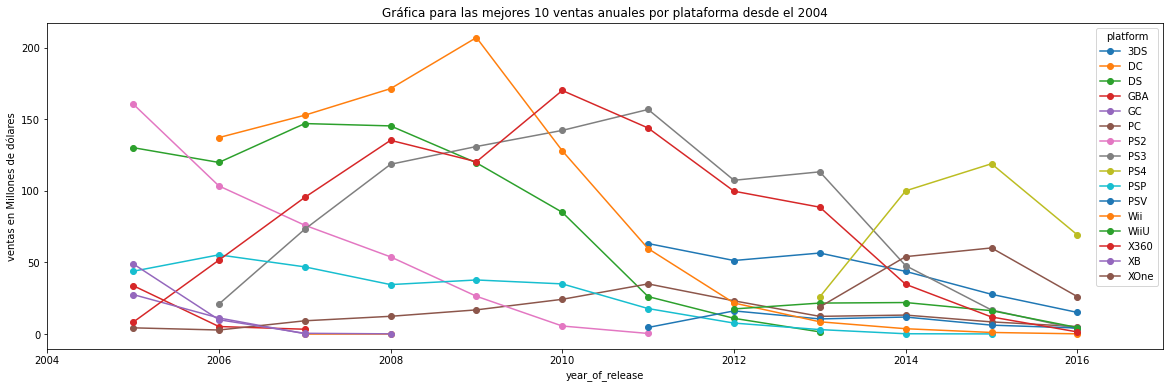

In [22]:
# creamos una grafica con datos a partir del año 2004 en adelante
games.query('year_of_release > 2004')[['platform','year_of_release','sales_total']]\
            .pivot_table(index='year_of_release', columns = 'platform', values = 'sales_total', aggfunc='sum')\
            .plot(xlim = (2004,2017), style = 'o-', figsize = (20,6))
plt.ylabel('ventas en Millones de dólares')
plt.title('Gráfica para las mejores 10 ventas anuales por plataforma desde el 2004')
plt.show()

In [23]:
# Realizemos una tabla para ver el total de ventas de las mejores 10 plataformas por año desde el 2013.
games.query('year_of_release > 2012')[['platform','year_of_release','sales_total']]\
            .pivot_table(index='platform', columns = 'year_of_release', values = 'sales_total', aggfunc='sum', margins=True).sort_values(by='All', ascending=False)
        

year_of_release,2013.0,2014.0,2015.0,2016.0,All
platform,,,,,
All,361.24,331.53,267.98,129.94,1090.69
PS4,25.99,100.00,118.90,69.25,314.14
PS3,113.25,47.76,16.82,3.60,181.43
XOne,18.96,54.07,60.14,26.15,159.32
3DS,56.57,43.76,27.78,15.14,143.25
X360,88.58,34.74,11.96,1.52,136.80
WiiU,21.65,22.03,16.35,4.60,64.63
PC,12.38,13.28,8.52,5.25,39.43
PSV,10.59,11.90,6.25,4.25,32.99


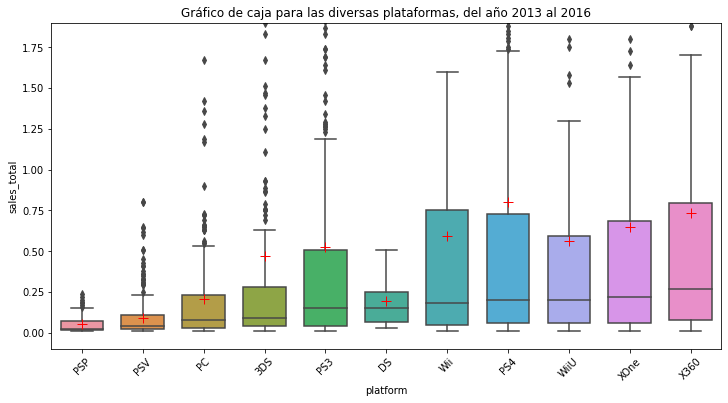

In [24]:
# creamos una gráfica boxplot para ventas totales por plataforma 
group_total = games.query('year_of_release > 2012')[['platform', 'sales_total']].groupby('platform').median().sort_values(by='sales_total')
data_box = games.query('year_of_release > 2012')[['platform','sales_total']]
f,ax = plt.subplots(figsize=(12,6))
sns.boxplot(data = data_box, x='platform', y='sales_total', width=0.7,
            showmeans =True, meanprops={"marker": "+",
                       "markeredgecolor": "red",
                       "markersize": "10"},
            order = group_total.index)
plt.ylim(-0.1,1.9)
plt.xticks(rotation=45)
plt.title('Gráfico de caja para las diversas plataformas, del año 2013 al 2016')
plt.show()

**Conclusion**
- Como podemos observar el año promedio para que una plataforma desaparezca es de una plataforma es de 12 por lo que para los siguientes analisis vamos a trabajar con los datos desde el año 2004.
- En nuestra grafica pudimos observar que teniamos un pick de venta en el año 2013 con las consolas de ps4, XOne ya que estas entraron para remplazar la ps3 y el x360. Las demas plataformas notamos que tienen una caida en sus ventas y nos rentables.
- continuamos con una tabla de ventas totales de las mejores 10 plataformas en los años 2013 hasta e 2016 y pudimos notar que las consolas mas rentables son las ps4 y la xone.
- con nuestro grafico de caja nos arrojo como resultado que las plataforma Xone wii ps4 y x360 sn las que tienen mas ventas promedio, mientras que las demas consolas tienen una venta promedio muy baja y sus años de vigencia ya estan pro acabar.



## Estudio de una plataforma en especifico.

In [25]:
# creamos el dataset a partir del año 2013 para la plataforma PS4.
games_ps4 = games.query('platform == "PS4" and year_of_release > 2012')\
        [['year_of_release','critic_score','user_score','sales_total']]
games_ps4.head()

,year_of_release,critic_score,user_score,sales_total
31,2015.0,NaN,7.4,14.63
42,2014.0,97.0,8.3,12.62
77,2015.0,82.0,4.3,8.58
87,2015.0,NaN,7.4,7.98
92,2014.0,83.0,5.7,7.66


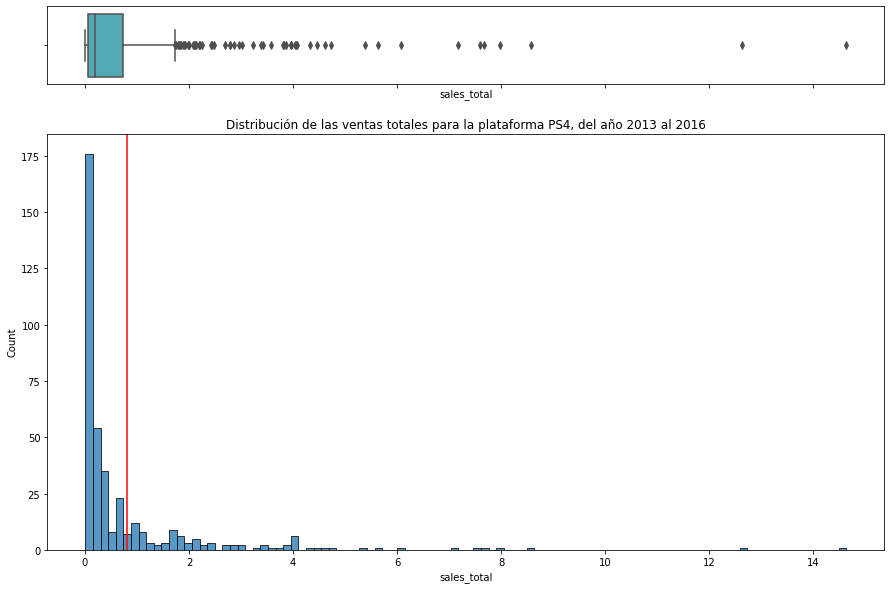

In [26]:
# creamos un gráfico de distribución para las ventas totales
f, ax = plt.subplots(2, sharex = True,
                     gridspec_kw = {"height_ratios": (.15, .80)}, figsize = (15,10))

plt.title('Distribución de las ventas totales para la plataforma PS4, del año 2013 al 2016')
# gráfico boxplot
sns.boxplot(x='sales_total', data = games_ps4, ax = ax[0], palette = 'YlGnBu_r')
# gráfico de distribución
sns.histplot(games_ps4['sales_total'], bins = 100, ax = ax[1])
# media de los datos en el histograma
ax[1].axvline(games_ps4['sales_total'].mean(), color='red')
plt.show()

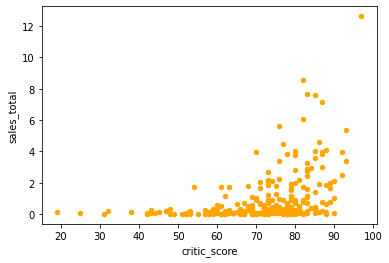

In [28]:
# vamos a hacer un diagrama de dispersion para observar el comportamiendo de las ventas totales frente a las criticas
games_ps4.plot(x= 'critic_score', y= 'sales_total', kind= 'scatter', color= 'orange')
plt.show()

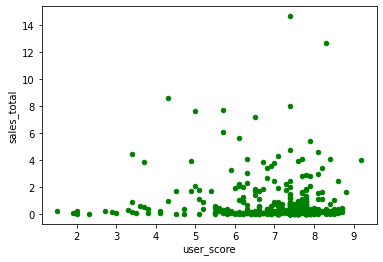

In [29]:
# vamos a hacer un diagrama de dispersion para observar el comportamiendo de las ventas totales frente a las reseñas.
games_ps4.plot(x= 'user_score', y= 'sales_total', kind= 'scatter', color= 'green')
plt.show()

In [30]:
# Vamos a obtener la matriz de correlacion.
games_ps4_corr = games_ps4.corr()
games_ps4_corr

,year_of_release,critic_score,user_score,sales_total
year_of_release,1.000000,-0.021142,0.154238,-0.235032
critic_score,-0.021142,1.000000,0.555157,0.406568
user_score,0.154238,0.555157,1.000000,-0.065482
sales_total,-0.235032,0.406568,-0.065482,1.000000


**Conclusión**
- Para observar el comportamiento realizamos una tabla con los datos de PS4 desde el año 2013, luego realizamos un diagrama donde pudimos observar que las ventas totales estan mas inclinadas hacia la derecha lo que nos indica que el promedio esta mas cerca de su tercer quartil.
- luego proseguimos con diagramas de dispersión que nos indicaron que no parece existir una relacion lineal entre las ventas totales con las reseñas y las criticas, que obteniendo la matriz de correlacion no los confirma.

## Ventas por genero.

In [31]:
# vamos a elegir las mejores 5 plataforma con mas ventas.
plat_list = ['PS4', 'PS3', 'XOne', '3DS', 'X360']
games_genre = games.query('year_of_release > 2012 and platform in @plat_list')[['genre', 'platform', 'year_of_release', 'name', 'sales_total']]
games_genre['platform'].value_counts()

PS4     392
PS3     345
3DS     303
XOne    247
X360    186
Name: platform, dtype: int64

In [32]:
# veamos las ventas totales por genero de las mejores 5 plataformas
games_genre.pivot_table(index= 'genre', values= 'sales_total', columns= 'platform', aggfunc= 'sum', margins=True).sort_values(by='All', ascending=False)

platform,3DS,PS3,PS4,X360,XOne,All
genre,,,,,,
All,143.25,181.43,314.14,136.80,159.32,934.94
Action,34.04,70.92,96.10,47.59,37.31,285.96
Shooter,0.06,31.79,88.56,35.48,60.33,216.22
Sports,1.82,32.35,55.61,25.96,26.74,142.48
Role-Playing,67.37,16.49,28.99,4.43,10.55,127.83
Misc,7.10,8.36,8.19,12.49,7.43,43.57
Racing,NaN,6.46,12.14,3.07,9.79,31.46
Fighting,8.21,6.05,8.65,2.55,2.45,27.91
Platform,8.79,3.33,7.69,2.14,0.93,22.88


**Conclusión**
- Como podemos observar aqui ya estamos solo trabajando con los datos desde el año 2013.
- Gracias a este estudio logramos observar que los generos mas vendidos fueron **Action, Shooter, Sports y role-playing**, y como lo hemos mencionado anteriormente seguimos con las plataformas con mayores ventas siguen siendo la PS4 y la XOne

## Ventas por región.

In [33]:
# relizaremos una funcion para obtener las ventas por region de las mejores cinco plataforma.
def best_five_reg(data,reg_group,var_reg):

    datos=data.query('year_of_release>2012')\
                    .pivot_table(index= reg_group, values= var_reg, aggfunc='sum')\
                    .sort_values((var_reg), ascending=False)[0:5]
    datos.reset_index(inplace=True)
    return datos

In [34]:
# obtenemos las ventas totales por plataforma para las regiones
plat_sales_na = best_five_reg(data= games, reg_group= 'platform', var_reg= 'na_sales')
plat_sales_eu = best_five_reg(data= games, reg_group= 'platform', var_reg= 'eu_sales')
plat_sales_jp = best_five_reg(data= games, reg_group= 'platform', var_reg= 'jp_sales')

In [35]:
# vamos a juntar nuestra tabla de venta por region 
plat_sales_na.merge(plat_sales_eu, on='platform', how='outer').merge(plat_sales_jp, on= 'platform', how= 'outer')\
.sort_values('platform').reset_index(drop=True)

,platform,na_sales,eu_sales,jp_sales
0,3DS,38.20,30.96,67.81
1,PS3,63.50,67.81,23.35
2,PS4,108.74,141.09,15.96
3,PSV,NaN,NaN,18.59
4,WiiU,NaN,NaN,10.88
5,X360,81.66,42.52,NaN
6,XOne,93.12,51.59,NaN


In [36]:
# vamos a continuar con las ventas por region pero esta vez por genero, usaremos la misma funcion.
genre_sales_na = best_five_reg(data= games, reg_group= 'genre', var_reg= 'na_sales')
genre_sales_eu = best_five_reg(data= games, reg_group= 'genre', var_reg= 'eu_sales')
genre_sales_jp = best_five_reg(data= games, reg_group= 'genre', var_reg= 'jp_sales')

In [37]:
genre_sales_na.merge(genre_sales_eu, on='genre', how='outer').merge(genre_sales_jp, on= 'genre', how= 'outer')\
.sort_values('genre').reset_index(drop=True)

,genre,na_sales,eu_sales,jp_sales
0,Action,126.05,118.13,40.49
1,Fighting,NaN,NaN,7.65
2,Misc,27.49,NaN,9.20
3,Racing,NaN,20.19,NaN
4,Role-Playing,46.40,36.97,51.04
5,Shooter,109.74,87.86,6.61
6,Sports,65.27,60.52,NaN


**Conclusión**
- En esta sección realizamos un estudio de ventas por regiones de las plataforma y los generos, lo que nos indico es que:
1. Respecto a las plataformas podemos notar que la plataforma 3DS tuvo la mayor venta en el pais de japon, los juegos para PS3 tuvieron las mejores ventas para los continentes de norteamerica y europa, quedando como top los juegos para la PS4 con mayores ventas en los continentes de europa y norteameria, con una baja en el pais de japon, y el resto de las plataformas tuvieron una venta de videojuegos muy baja para los continentes incluso hasta valores nulos.
2. respecto a los generos logramos obtener que los juegos de Action y shooter son los mas vendidos en los continentes europa y norteamerica con una gran diferencia en el pais de japon, dejando a los juegos de roles en tercer lugar con mayores ventas y siendo el que mas vende en el pais de japon.

## Efecto de la clasificación ESRB

In [38]:
# Veamos los valores de la columna de rating 
games['rating'].unique()

array(['E', 'T', 'M', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

- Para un mejor trabajo con esta columna va a suplantar los valores.
- T = B
- M = C
- E10+ = D
- K-A = A
- AO = F
- EC = G
- RP = H

In [39]:
# Cambio de valores
games['rating'] = games['rating'].replace('T', 'B')
games['rating'] = games['rating'].replace('M', 'C')
games['rating'] = games['rating'].replace('E10+', 'D')
games['rating'] = games['rating'].replace('K-A', 'A')
games['rating'] = games['rating'].replace('AO', 'F')
games['rating'] = games['rating'].replace('EC', 'G')
games['rating'] = games['rating'].replace('RP', 'H')
games['rating'].unique()

array(['E', 'B', 'C', 'D', 'A', 'F', 'G', 'H'], dtype=object)

In [40]:
games_rating = games.query('year_of_release > 2012')[['year_of_release', 'rating', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales' ]]
games_rating.head()

,year_of_release,rating,na_sales,eu_sales,jp_sales,other_sales
16,2013.0,C,7.02,9.09,0.98,3.96
23,2013.0,C,9.66,5.14,0.06,1.41
31,2015.0,C,6.03,5.86,0.36,2.38
33,2013.0,B,5.28,4.19,4.35,0.78
42,2014.0,C,3.96,6.31,0.38,1.97


In [41]:
rating_corr = games_rating.corr()
rating_corr

,year_of_release,na_sales,eu_sales,jp_sales,other_sales
year_of_release,1.000000,-0.124551,-0.087983,-0.074142,-0.090225
na_sales,-0.124551,1.000000,0.769995,0.264513,0.817367
eu_sales,-0.087983,0.769995,1.000000,0.244616,0.934796
jp_sales,-0.074142,0.264513,0.244616,1.000000,0.195192
other_sales,-0.090225,0.817367,0.934796,0.195192,1.000000


**Conclusión**
- Ya que la correlacion de estos valores es muy baja coincidimos en que no existe una relacion lineal entre las ventas totales y el rating.

## Prueba de hipótesis.

- **H0:** Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son iguales.
- **H1:** Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC no son iguales.

In [42]:
# crearemos el set de datos para poder trabajar 
games_hipo_xone = games.query('platform == "XOne" and year_of_release > 2012')['user_score']
games_hipo_pc = games.query('platform == "PC" and year_of_release > 2012')['user_score']

In [43]:
# Primero realizaremos una prueba de levene para verificar la varianza de ambas poblaciones.
alpha = 0.05

# prueba de Levene para comparar las varianzas de los grupos
results = st.levene(games_hipo_xone, games_hipo_pc)

# mostramos las varianzas de cada muestra
print(f'La varianza de xeon es: {np.var(games_hipo_xone)}',end='\n')
print(f'La varianza de pc es: {np.var(games_hipo_pc)}',end='\n\n')
print('p-value: ', results.pvalue)

# si el valor p es menor que alfa, rechazamos la hipótesis
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

La varianza de xeon es: 1.5664154469012772
La varianza de pc es: 2.6878614820413764

p-value:  0.001802066124442326
Rechazamos la hipótesis nula


In [44]:
# realizaremos el t de student
alpha= 0.05
results = st.ttest_ind(games_hipo_xone, games_hipo_pc, equal_var=False)

# mostremos las varianzas de cada muestras
print(f'La Varianza de xone es: {np.var(games_hipo_xone)}', end= '\n')
print(f'La varianza de pc es: {np.var(games_hipo_pc)}', end= '\n\n')
print('p-value: ', results.pvalue)

# Si el valor p es menor que alfa rechazamos la hipótesis 
if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No rechazamos la hipotesis nula')

La Varianza de xone es: 1.5664154469012772
La varianza de pc es: 2.6878614820413764

p-value:  0.05355232069397892
No rechazamos la hipotesis nula


- **H0:**  Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
- **H1:**  Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes  no son iguales.

In [45]:
# crearemos el set de datos para poder trabajar 
games_hipo_action = games.query('genre == "Action" and year_of_release > 2012')['user_score']
games_hipo_sports = games.query('genre == "Sports" and year_of_release > 2012')['user_score']

In [46]:
# Primero realizaremos una prueba de levene para verificar la varianza de ambas poblaciones.
alpha = 0.05

# Prueba de Levene para comparar las varianzas de los grupos
results=st.levene(games_hipo_action, games_hipo_sports)

# mostramos las varianzas de cada muestra
print(f'La varianza de action es: {np.var(games_hipo_action)}',end='\n')
print(f'La varianza de sports es: {np.var(games_hipo_sports)}',end='\n\n')
print('p-value: ', results.pvalue)

# si el valor de p es menor que alfa, rechazamos la hipótesis
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula las varianzas no son iguales")
else:
    print("No rechazamos la hipótesis nula")

La varianza de action es: 0.9753029197826695
La varianza de sports es: 3.2449194252773172

p-value:  6.356222799070446e-37
Rechazamos la hipótesis nula las varianzas no son iguales


In [47]:
alpha= 0.05
results = st.ttest_ind(games_hipo_action, games_hipo_sports, equal_var=False)

# mostremos las varianzas de cada muestras
print(f'La Varianza de action es: {np.var(games_hipo_action)}', end= '\n')
print(f'La varianza de sports es: {np.var(games_hipo_sports)}', end= '\n\n')
print('p-value: ', results.pvalue)

# Si el valor p es menor que alfa rechazamos la hipótesis 
if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No rechazamos la hipotesis nula')

La Varianza de action es: 0.9753029197826695
La varianza de sports es: 3.2449194252773172

p-value:  3.832628984221931e-21
Rechazamos la hipotesis nula


**conclusión**
- Realizamos una prueba de levene para verificar las varianzas de las poblaciones y logramo concluir que son diferentes y por ende el parametro equal_var lo clasificamos en False, decidi colocar el parametro de alpha en 0.05 por ser el mas ido .
- Ambas hipotesis fueron rechazadas ya que las varianzas no son iguales.
- Las calificaciones promedio de los usuarios para los generos de Accion y deportes no son iguales.
- tambien concluimos que la correlacion de estos valores es muy baja coincidimos en que no existe una relacion lineal entre las ventas totales y el rating.
- las plataforma Xone wii ps4 y x360 sn las que tienen mas ventas promedio, mientras que las demas consolas tienen una venta promedio muy baja y sus años de vigencia ya estan por acabar.
- Gracias a este estudio logramos observar que los generos mas vendidos fueron **Action, Shooter, Sports y role-playing**
- Lo que nos indica que las mejores plataformas para pronostico de ventas de promocion de juegos para el 2017 es la PS4 y la Xone.
- 